# Analytical Calculation of Transmission Probability (TP)

Here we will show how to calculate the gamma-ray transmission probability analytically.
    
Mass attenuation coeffients are from NIST XCOM:</n>
https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html

Atmospheric data is fom NRLMSIS:</n>
https://swx-trec.com/msis
    
A great review of the relationship between transmitted intensity, linear attenuation coefficient, and mass attenuation coefficient can be found here:</n>
https://www.nde-ed.org/Physics/X-Ray/attenuationCoef.xhtml

In [1]:
# Imports:
from cosi_atmosphere.response.AtmosphericProfile import Atmosphere
from cosi_atmosphere.response.TPCalc import TPCalculator
import numpy as np
import os

## Get atmosphere model
We'll use values based on the 2016 COSI balloon flight:

In [2]:
instance = Atmosphere()
date = np.array(['2016-06-13 12:00:00'], dtype="datetime64[h]")
lat = -5.66
lon = -107.38
alts = np.linspace(0, 200, 2001) # km; spacing is 0.1 km (100 m) 
atm_model = instance.get_atm_profile("rep_atm_model.dat",date,lon,lat,alts)

Define instance of TP class, and read in atmosphere and mass attenuation coefficient data. Here we will use the default mass attenaution data, calculated for an atomospheric composition with 78% N2 and 22% O2. Note that you can also pass a different attenuation data file from XCOM if needed. 

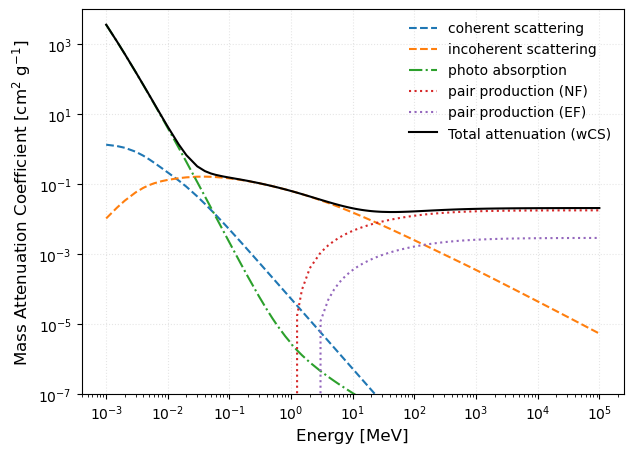

In [4]:
tp_instance = TPCalculator()
tp_instance.read_atm_model("rep_atm_model.dat")
tp_instance.read_mass_attenuation()

Let's take a look at the atmospheric relative abundance as a function of altitude. As can be seen, the atmosphere is mostly N2 (\~78%) and O2 (\~22%), although the composition does begin to change above ~100 km.

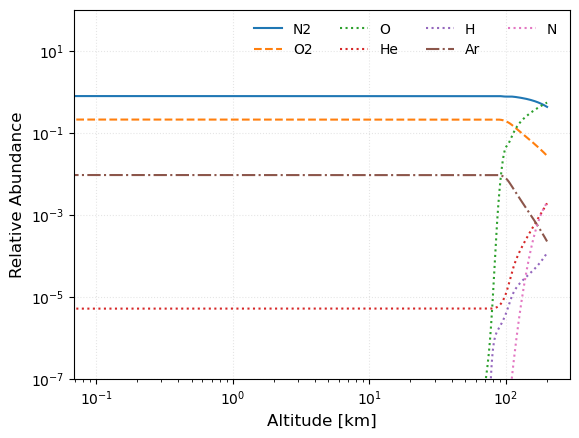

In [5]:
tp_instance.relative_abundance()

Now we can calculate the TP. Let's use an altitude of 33.5 km, and an off-axis angle of 50 degrees:

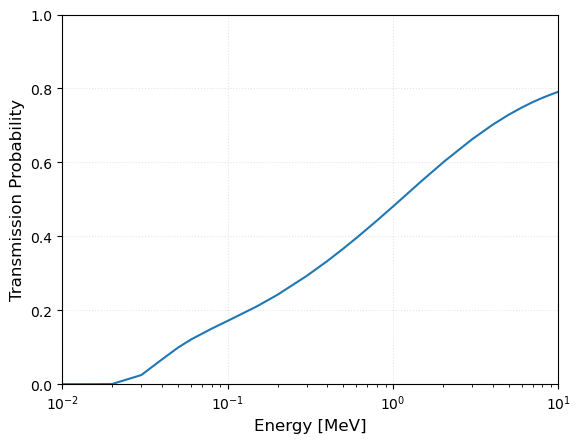

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
75    0.788183
76    0.788092
77    0.788092
78    0.788001
79    0.787911
Name: atten_tot_wCS[cm2/g], Length: 80, dtype: float64

In [6]:
tp_instance.calc_tp(33.5,50,output_name="TP_33p6km_theta50_analytical.dat")

Now let's calculate the TP file for MEGAlib's cosima:

Max theta for given altitude due to Earth occultation [deg]: 95.85962050942686


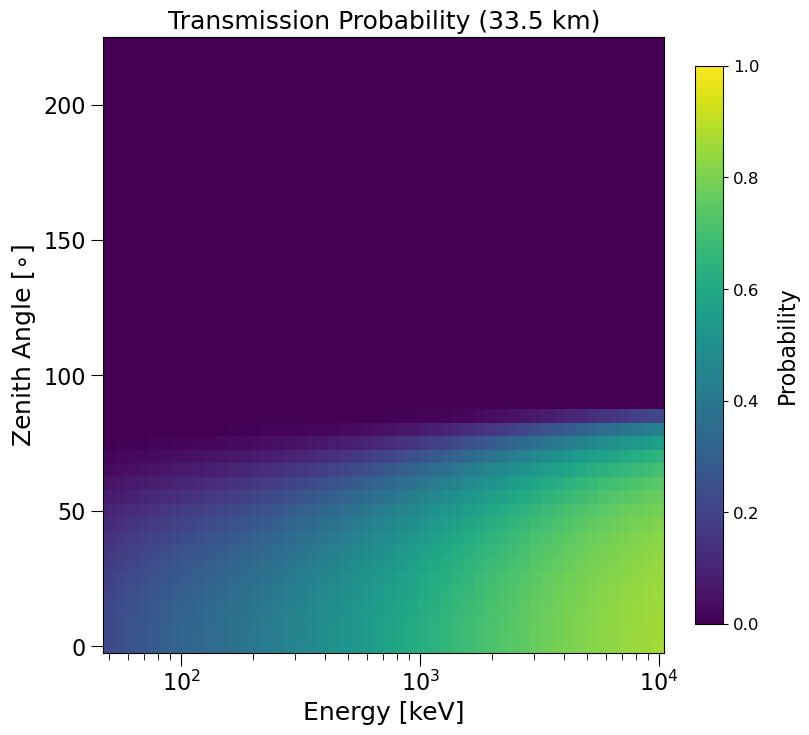

In [7]:
tp_instance.cosima_tp_file(33.5,"TP_cosima_33p5km")

Let's take a look at the first 50 lines of the TP file for cosima: 

In [8]:
%%capture
os.system("head -n 50 TP_cosima_33p5km.dat")

IP LIN

# Theta axis in degrees:
XA 0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 90.001 180 
# Energy axis in keV:
YA 49.99999999999999 55.709569209792114 62.07112203081239 69.1591093740999 77.05648380328007 85.85567035004112 95.65964818837426 106.58315582669209 118.75403392250328 132.3147214349539 147.42392262509864 164.2584644132395 183.01536583047076 203.91414378376078 227.19938211953857 253.14359405220867 282.05041145734094 314.25813835466175 350.14371016818893 390.1271050997625 434.6762592434215 484.31254296349834 539.6168626279089 601.2364591068078 669.8924826012209 746.388432451844 831.6195607012854 926.5833494621031 1032.3911847100012 1150.2813631236224 1281.6335841933885 1427.9850972043125 1591.0486920651067 1772.732744535005 1975.1635504427547 2200.7102102809863 2452.012355406897 2732.0110403361195 3043.983162670423 3391.5798134845986 3778.8690069970835 4210.383289600847 4691.172785435414 5226.864299306152 5823.727168647751 6488.746635214575 7229.705595185846 8055.2

For fun, let's make a short gif showing how the TP changes with altitude. First, calculate the TP for a range of altitudes:

In [9]:
alt_list = np.arange(25,46,1).tolist()
image_list = []
for each in alt_list:
    print(each)
    this_name = "TP_%s" %str(each)
    image_list.append(this_name + ".png")
    tp_instance.cosima_tp_file(each,this_name,show_plot=False)

25
Max theta for given altitude due to Earth occultation [deg]: 95.06474157390615
26
Max theta for given altitude due to Earth occultation [deg]: 95.16470698248163
27
Max theta for given altitude due to Earth occultation [deg]: 95.2627486169415
28
Max theta for given altitude due to Earth occultation [deg]: 95.35897207377991
29
Max theta for given altitude due to Earth occultation [deg]: 95.45347360574536
30
Max theta for given altitude due to Earth occultation [deg]: 95.54634124035411
31
Max theta for given altitude due to Earth occultation [deg]: 95.6376557319047
32
Max theta for given altitude due to Earth occultation [deg]: 95.72749137632073
33
Max theta for given altitude due to Earth occultation [deg]: 95.81591671223384
34
Max theta for given altitude due to Earth occultation [deg]: 95.90299512713601
35
Max theta for given altitude due to Earth occultation [deg]: 95.98878538385713
36
Max theta for given altitude due to Earth occultation [deg]: 96.07334207980502
37
Max theta for g

I'll make a gif following this nice example: https://www.codedex.io/projects/create-a-gif-with-python. Make sure you have the package installed.

In [10]:
import imageio.v3 as iio

filenames = image_list
images = [ ]

for filename in filenames:
  images.append(iio.imread(filename))

iio.imwrite('TP_alt_variation.gif', images, duration = 500, loop = 0)

Now play the gif:

![MyGif](TP_alt_variation.gif)